# Churn Prediction - Data Science Case Study

In [87]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTEN

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

#data = pd.read.csv('')
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

## Introduction
### Problem
This case study is supposed to demonstrate basic data science techniques and their potential to guide business decisions when applied to real world problems.
The dataset contains information concerning customers of a portugese telecomunication company.
The central problem, this case study aims to solve, is to determine causes of churn. The feature 'churn' in the dataset shows wich customers canceled their contracts during the last month. The urgency with witch companies try to find and eliminate causes of churn is explained by the fact, that the aquisition of new customers is 5-25 times more expensive (depending on study and industry) than the costs of keeping current customers (Gallo, 2014, S.1).

### Goals
The main goal of this case study is to work out features correlating with churn. An EDA is supposed to allow the drawing of first conclusions pertaining the dataset. On the basis of those first results three mlms are going to be trained using different methods of data preprocessing. The reasoning behind the choice of preprocessing methods is to be explained according to the findings of the EDA.


## EDA
### Data Shape & Quality


import data.

In [88]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.drop(['customerID'], axis= 1, inplace = True)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Cardinality:

In [89]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Missing values.

In [90]:
print('is empty:\n', data.eq('').sum() + data.eq(' ').sum())
print('is null:\n', data.isnull().sum())
print('is zero:\n', data.eq(0).sum())

is empty:
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
is null:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
is zero:
 gender                 0
SeniorCitizen     

In [91]:
zeroIndexCharges = data[data['TotalCharges'] == ' '].index

zeroIndexTenure = data[data['tenure'] == 0].index

print('indexes of emtpy Charges rows:\n' + str(zeroIndexCharges) + '\nindexes of empty tenure rows:\n' + str(zeroIndexTenure))


indexes of emtpy Charges rows:
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
indexes of empty tenure rows:
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


Check data types.

In [92]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Summary:
- 7043 entries.
- Features: 3 numeric, 19 nominal.
- Feature 'CustomerID' does not contain valuable information and is to be dropped in data prep.
- 'SeniorCitizen' is the only nominal feature that's dummy encoded.
- Values of 'TotalCharges' are saved as Obj types, instead of as floats.
- low cardinality among all features (max. cardinality = 4).
- features can be seperated into different categories: demographic, account Information, subsribed services of contract.
- 22 duplicate rows.
- 11 entries with missing values in 'TotalCharges' and 'Tenure'. The indices of both feature's missing entries were compared and found to be in the same data entries.

### Statistics
Value distribution of numeric features (excluding dummy encoded 'SeniorCitizen'):

In [93]:
data['TotalCharges']=data['TotalCharges'].replace(" ", 0)
data['TotalCharges']= pd.to_numeric(data['TotalCharges'])

Outlier detection:
First define function.

In [94]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df >(q3+1.5*IQR)))]
    return outliers



Then search in every numeric column.

In [95]:
print("Outliers in 'tenure' = " + str(len(find_outliers_IQR(data['tenure']))))
print("Outliers in 'MonthlyCharges' = " + str(len(find_outliers_IQR(data['MonthlyCharges']))))
print("Outliers in 'TotalCharges' = " + str(len(find_outliers_IQR(data['TotalCharges']))))

Outliers in 'tenure' = 0
Outliers in 'MonthlyCharges' = 0
Outliers in 'TotalCharges' = 0


No outliers detected.

A histogramm gives insight into the value distribution of numeric features

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

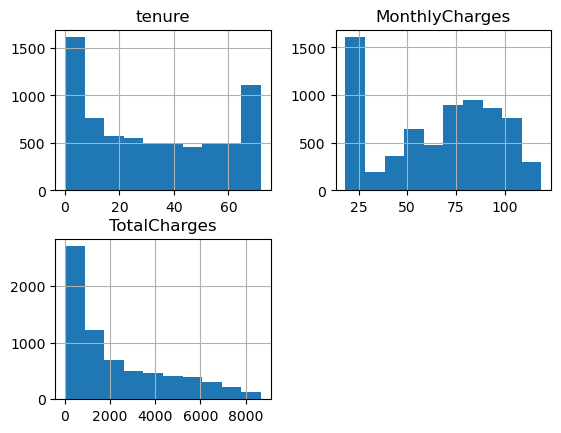

In [96]:
data.drop("SeniorCitizen", axis=1).hist()

'TotalCharges' appears to show costs over the whole contract period. A high correlation with 'tenure' and 'TotalCharges' is to be expected, and examined further.

There is a strong data imbalance in the 'churn' feature:

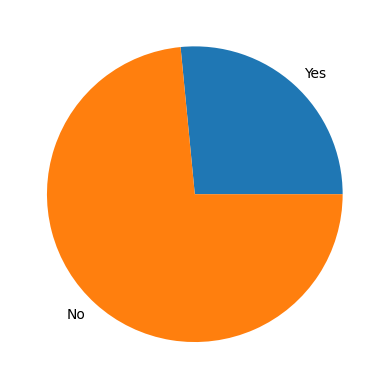

In [97]:
fig, ax = plt.subplots()
ax.pie([data['Churn'].eq("Yes").sum(), data['Churn'].eq("No").sum()], labels = ["Yes", "No"])


plt.show()

The 'No'-class of 'Churn' is found about three times more often than the 'Yes'-class. For the training of mlms this imbalance obviously translates to the models training focusing about three times as much on predicting the 'No'-class. As the goal of this case study is to train models that are supposed to help prevent churn, they ought to focus more heavily on the correct detection of churn, than is's absence. Methods for handling these kinds of situations, along with a discussion about suitable evaluation metrics will follow later.

First the dataset is to be examined more thoroughly. To this end the data is split into the three categories found earlier: Demographic information, account information and customer account information. To visualize possible correlation with customer churn, the classes of each of the features are to be divided into entries with positive and negative churn values.


In [98]:
predictionVariable = pd.DataFrame(data.Churn)
services = pd.DataFrame(data[['DeviceProtection', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']])
accountInfo = pd.DataFrame(data[['tenure', 'Contract','PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']])
custDemographic = pd.DataFrame(data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']])

In [99]:
def createPlotGrid(data, corrVarStr, sizeWidth, sizeHeight, fRows, fCols):
    plotRow = 0
    plotCol = 0
    
    f = plt.figure(figsize=(sizeWidth, sizeHeight))
    gs = f.add_gridspec(fRows,fCols)

    for n, col in enumerate(data.columns):

        ax = f.add_subplot(gs[plotRow, plotCol])
        sns.countplot(data = data, x = col, hue = corrVarStr)


        if plotCol < (fCols - 1):
           plotCol += 1
        else:
            plotCol = 0
            plotRow += 1

    f.tight_layout()


#### Demographic information

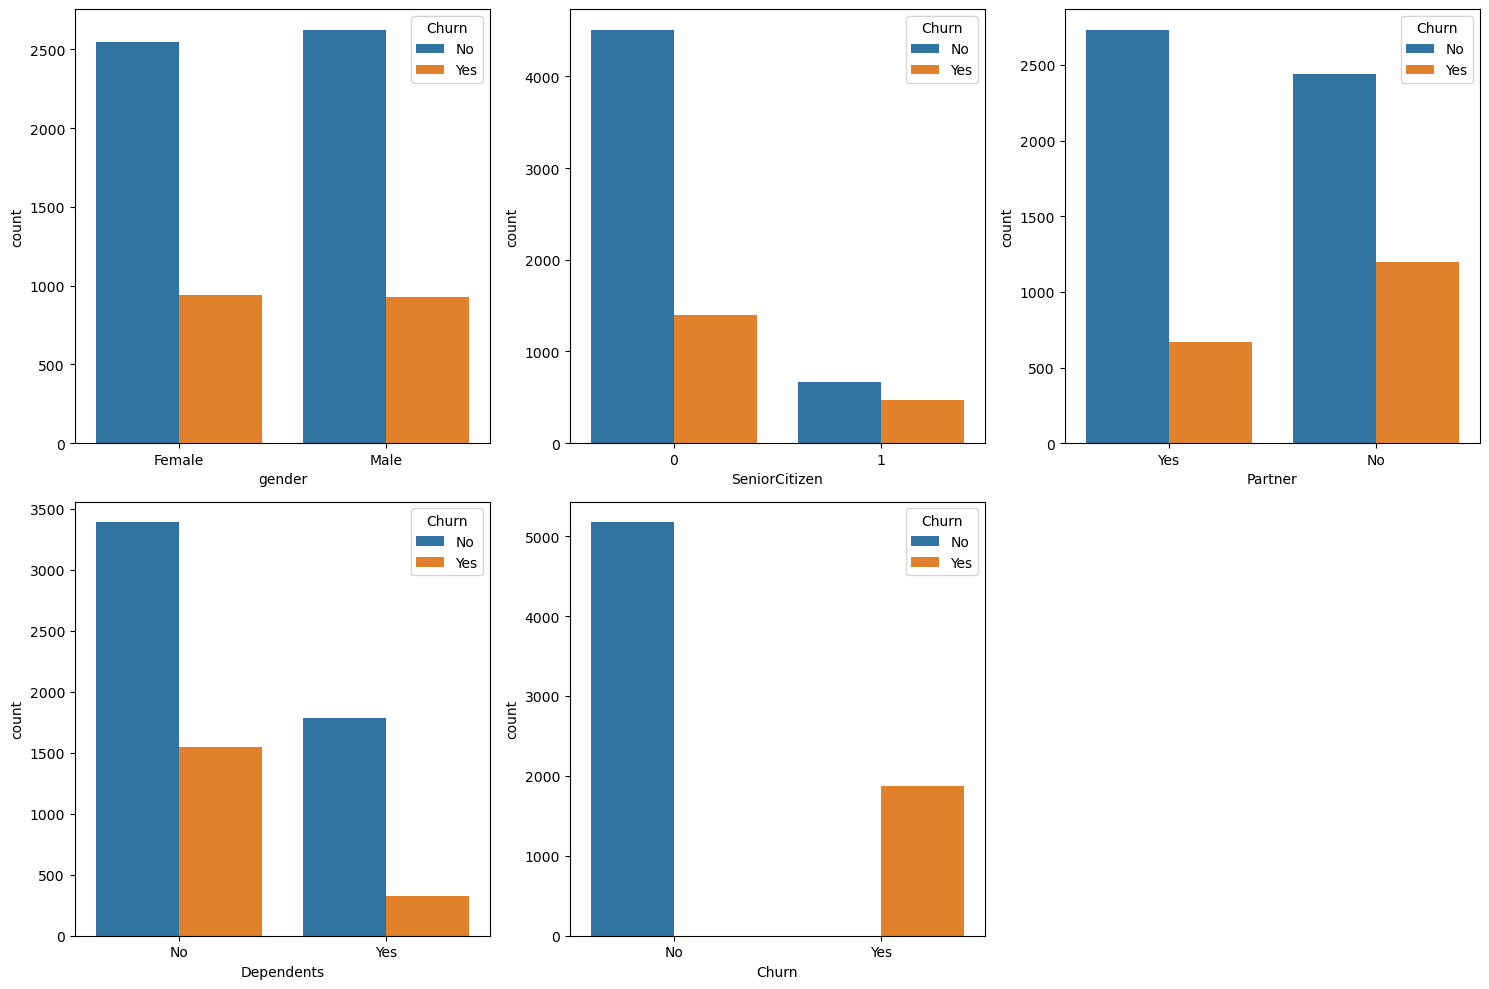

In [100]:
createPlotGrid(custDemographic, "Churn", 15, 10, 2, 3)

- Gender is irrelevant for churn.
- Senior citizens make up small customer segment with high churn percentage.
- Singles make up about half of the customer base and churn twice as much as customers in relationships.
- Customers with dependents churn less frequently.

#### Account Information

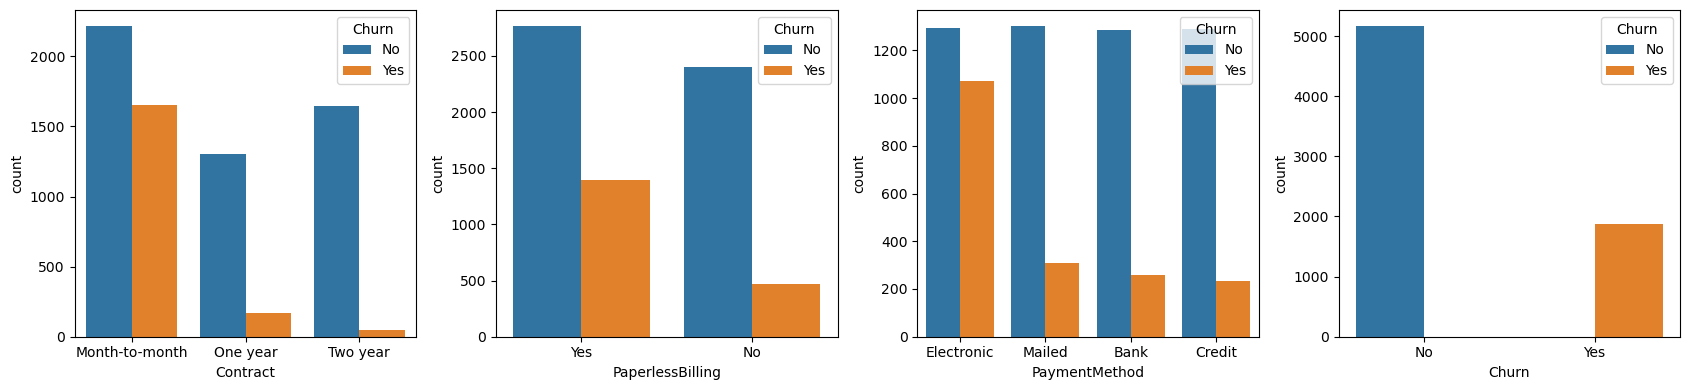

In [101]:
accountFigData = accountInfo.drop(['tenure','MonthlyCharges', 'TotalCharges'], axis = 1)

accountFigData = accountFigData.replace({'PaymentMethod' : {'Electronic check': 'Electronic', 'Mailed check' :'Mailed', 'Bank transfer (automatic)' :'Bank', 'Credit card (automatic)': 'Credit'}})


createPlotGrid(accountFigData, "Churn", 17, 4, 1, 4)

- for the purpose of readability the "PaymentMethod" feature's class names have been abbreviated. 
- Chrun correlates negatively with length of contract. From the three available features the chrunrate's growth seems to be exponential.
- Highest churnrate in the classes of the feature 'Contract' is found in the customer segment containing the greatest amount of customers: 'Month-to-month'. Positive churn values can be found in almost half of the entries of the class. Sadly, the given data does not contain information about this being a singular, or monthly recurring occurence/trend. For the interpretation and the formulation of strategic action, according to data analysis, this information would be urgently needes. For the sake of this case study it is assumed, that this is not an irregular occurence.
- Customers that chose paperless billing are three times less likely to churn. The assumption that a greater part of those customers are made up of busineses that need those bills for their tax returns could be further examined with more data.

#### Services

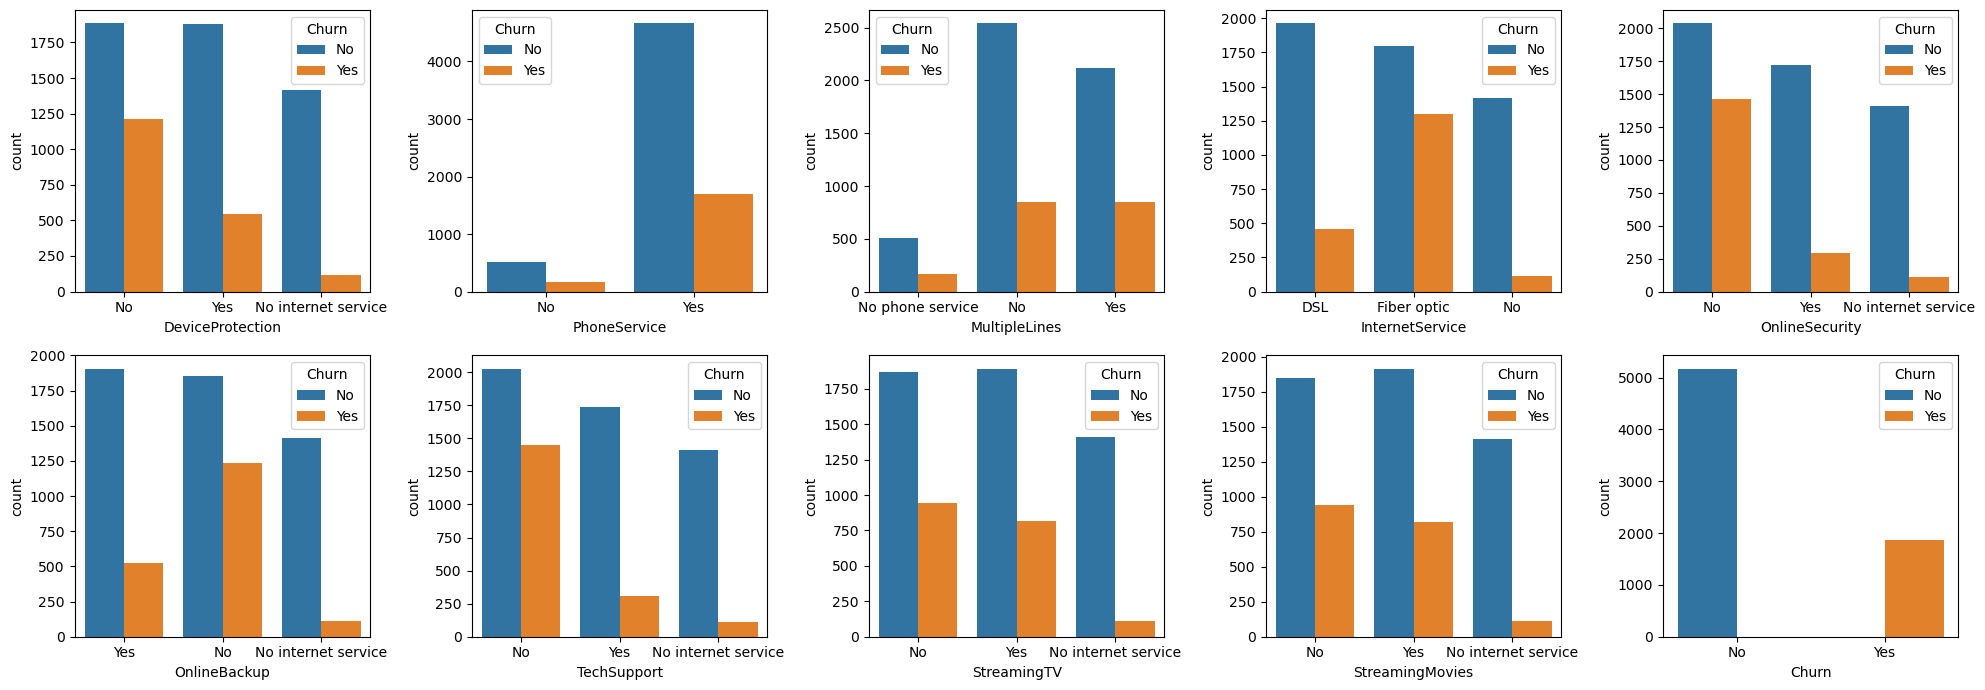

In [102]:

createPlotGrid(services, "Churn", 20, 7, 2, 5)

This segment seems to allow further insight into the correlation of features to churn and the dataset in general:
- The churn correlation of many features exhibit a strong skewedness away from classes containing the customers who booked additional services for their contracts. It is to be expected that those features will be chosen by algorithms for feature selection in later stages of the case study.
- The biggest differences in the distribution of churning customers are found in the features "DeviceProtection", "InternetService", "OnlineSecurity", "OnlineBackup", and "TechSupport", while the features "MultipleLines", "StreamingTV" and "StreamingMovies" show comparatively little differnce among their respective classes.
- An outlier to the described observations is found in the feature "InternetService". Where other features show less churn in more expensive contract options, via the booking of additional services, the most expensive class of "InternetService", "Fiber optic" exhibits a chrunrate close to 50%, more than double the chrunrate of the less performant but cheaper "DSL" class. This points to dissatisfaction of customers with the cost-benefit-ration of fibre optics internet connections provided by the company in the month this dataset represents. Sadly this interpretation cannot be made with much confidece with the data on hand, as more information would be needed to verify this claim. Useful informations could be comprised of, but not limited to, customer feedback, customer satisfaction data and statistics about technical parameters like the average internet speed and connection downtime in the previous and current months.

the last step of this EDA will focus on further examining the correlation tendencies that have become apparent from the visualizations in this section. 

### Correlation, collinearity and multicolinearity

#### Background / Motivation
Especially in the context of prediction models based on regression techniques that will be applied to the dataset in this case study the kinds of associations between features are of importance for the functioning of those models. Some neccacary terms for understanding these relationships are:
- Correlation: A linear relationship between two features. With growing values in some feature A values in some feature B also grow/diminsih by some coefficient X (A = XB).
- Collinearity: Problem occuring in the application of regression models in datasets where two or more features are strongly linearly correlated. As regresison models weigh the impact of a number of independent variables on some dependent variable (churn, in this case) by assigning coefficients to each independent variable signifying the impact of their values on the value of the dependent variable, it would not be possible for these models to assign distinct coeefficients to two collinear features.
- Multicollinearity: An extreme case of collinearity in a dataset. Describes cases where at least three features show collinearity. 

On this basis this section of the EDA aims to answer three questions:
1. How strongly do whole features correlate with churn?
2. What impact do individual classes of nominal features have on their correlation?
3. How do features correlate with each other? Is there (multi-)collinearity in the dataset?


In order to use the intended methods for examining collinearity in the dataset the data will need to be prepared in certain ways.
To enable label encoding, the missing values of the features "tenure" and "TotalCharges" will be imputed to the mean of their respective features.

In [103]:
data['tenure'] = np.where(data['tenure'] == 0, np.nan, data['tenure'] )
data['tenure'] = data['tenure'].fillna(data['tenure'].mean())

data['TotalCharges'] = np.where(data['TotalCharges'] == 0, np.nan, data['TotalCharges'] )
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

print(data.isna().sum())



gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


To calculate the correlation of all features among themselves, the imputed dataset is label encoded and numeric features are scaled.

In [104]:
le = LabelEncoder()
scaler = MinMaxScaler(feature_range=(0,1))


scaledEncodedData = data.apply(le.fit_transform)

scaledEncodedData[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(scaledEncodedData[['tenure', 'MonthlyCharges', 'TotalCharges']])


scaledEncodedData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.089646,0.011332,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.314394,0.554977,0
2,1,0,0,0,0.013889,1,0,0,2,2,0,0,0,0,0,1,3,0.275253,0.082083,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.167929,0.546708,0
4,0,0,0,0,0.013889,1,0,1,0,0,0,0,0,0,0,1,2,0.460227,0.103216,1


#### Heatmap
From this data a heatmap can be used to visualize the relationships:

C:\Users\Dominik\AppData\Local\Temp\ipykernel_3044\2015378808.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


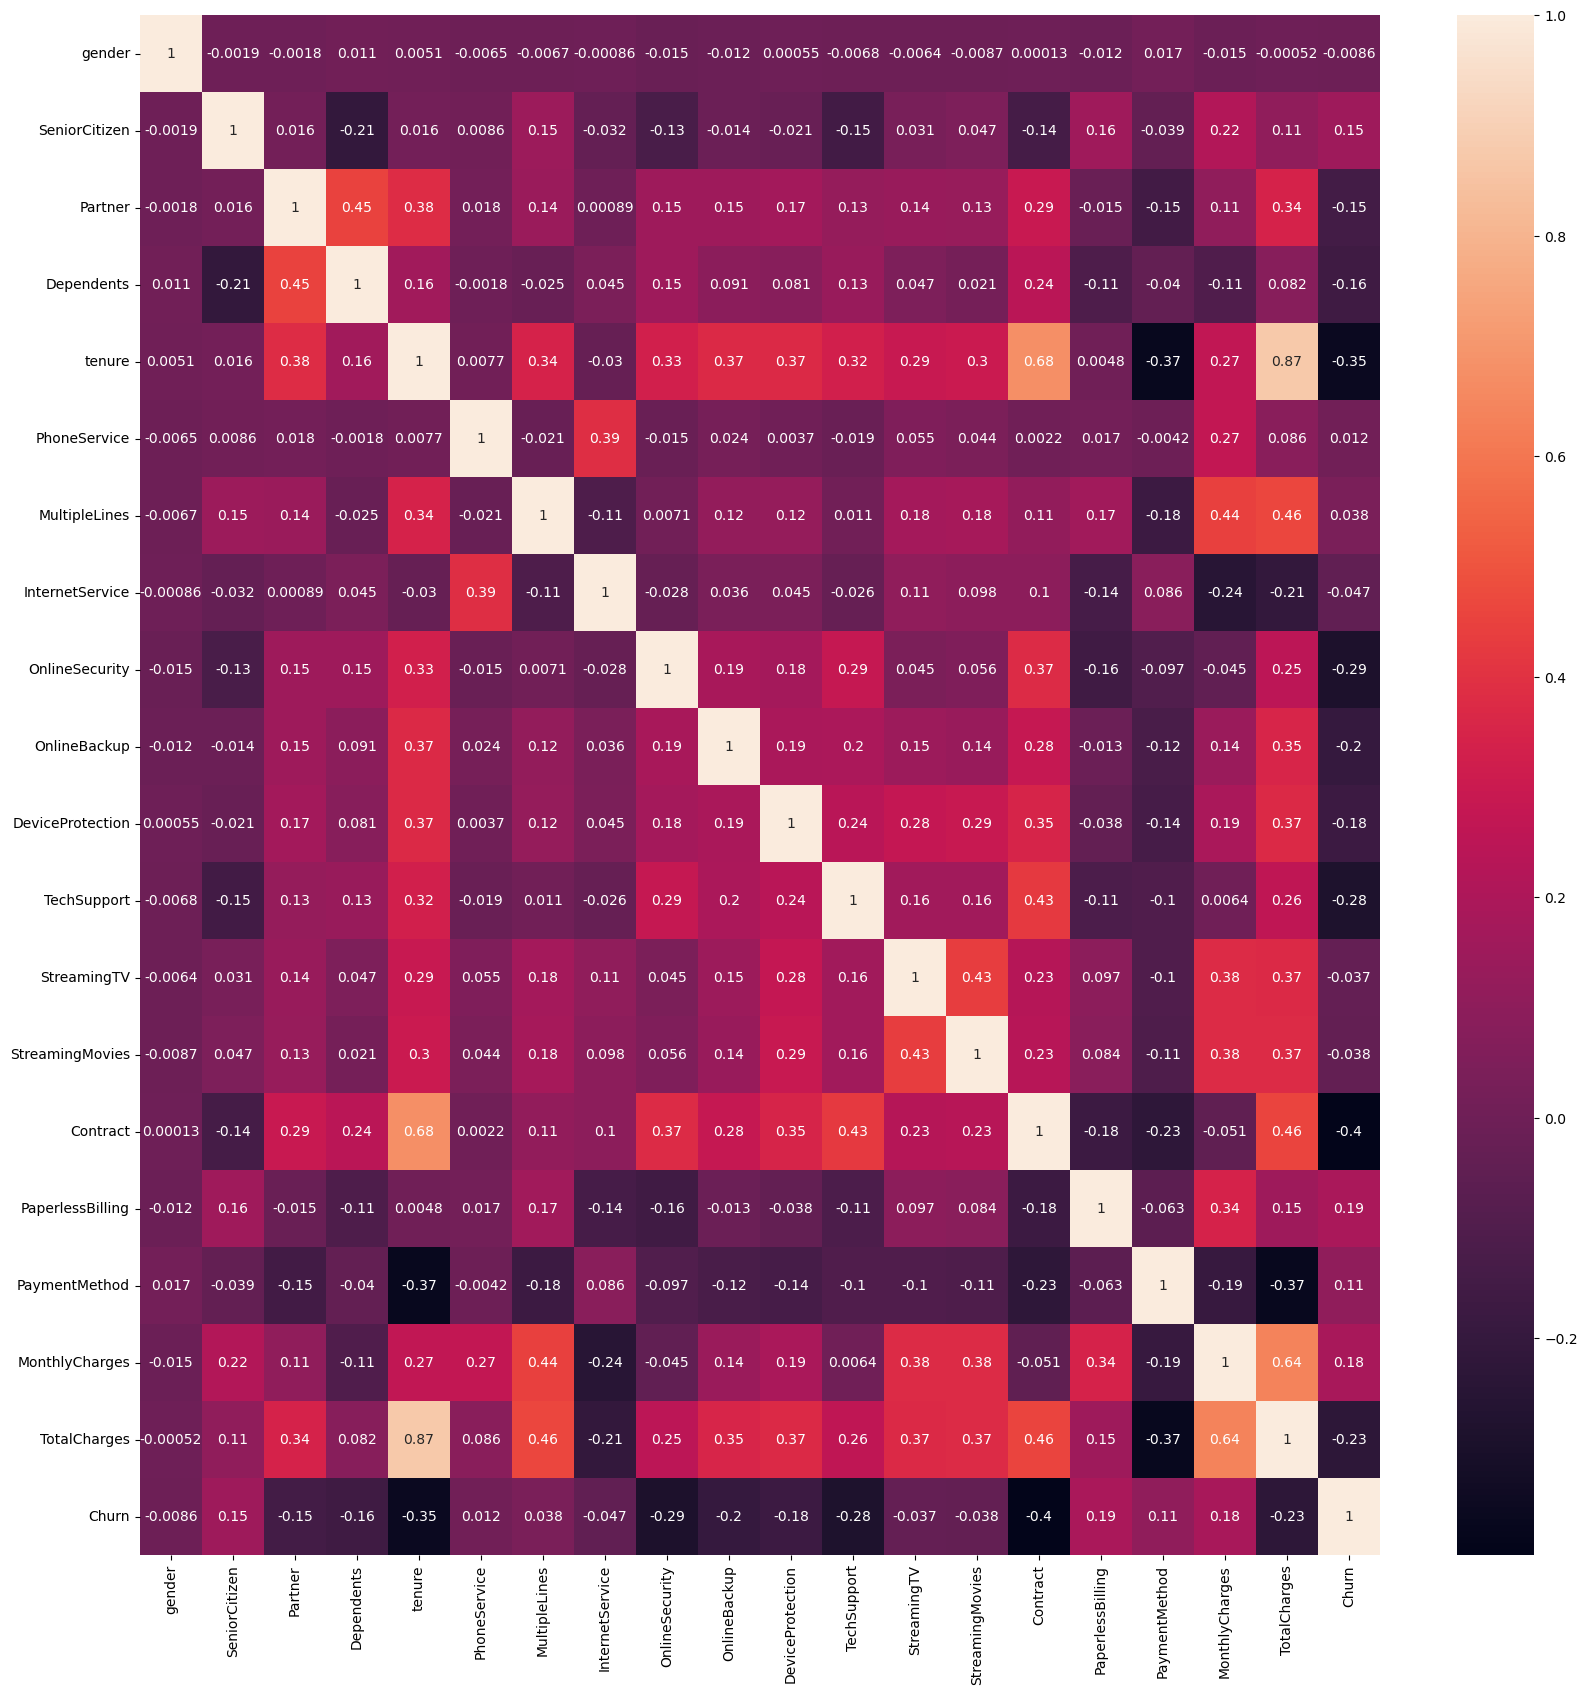

In [105]:

corr_matrix = scaledEncodedData.corr()
f = plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot= True)

f.show()

This heatmap gives a good answer to question 1. of this section.
Some oservations that come to mind:
- The strongest correlation can be found for 'tenure' and 'TotalCharges' with 0.87.
- The relatively high correlation of the features 'partner' and 'Dependents' makes sense, as customers with partners are more likely to raise children than customers who are single, thus contributing to the correlation of those features.
- Interpretation of nominal feature's correaltion coefficients proves to be difficult in most cases, as the coefficient summarizes the impact of all data classes of a feature.
- Another problem with the heatmap's interpretation encoding method of the dataset. As the nominal features had to be label encoded, an odrinality was artificially added into the features. Furthermore the given ordinality was not manually controlled, to minimize its impact on the calculation of coefficients. For example, for all service-features that contain the class 'No internet service' this class should have been assigned to the number zero, the class 'No' to the number one, and the class 'Yes' to the number two.

The heatmap does give a general overview of the features relationships to one another, but does not do a good job of answering any more of the stated questions.

#### Class Correlation with Churn - Calculation of Coefficients
The heatmap gives a comparatively good overview of the correlation of all classes of all features to one another, but doesn't give insight towards the correlation of the individual classes of the nominal features. Therefore another way to approach the examination of correlations in a dataset is to use the .corr function that computes correation coefficients for two columns.
In combination with a dummy encoding the correlation coefficient of each class of all features with the dependent variable 'Churn' can be visualized.

<Axes: >

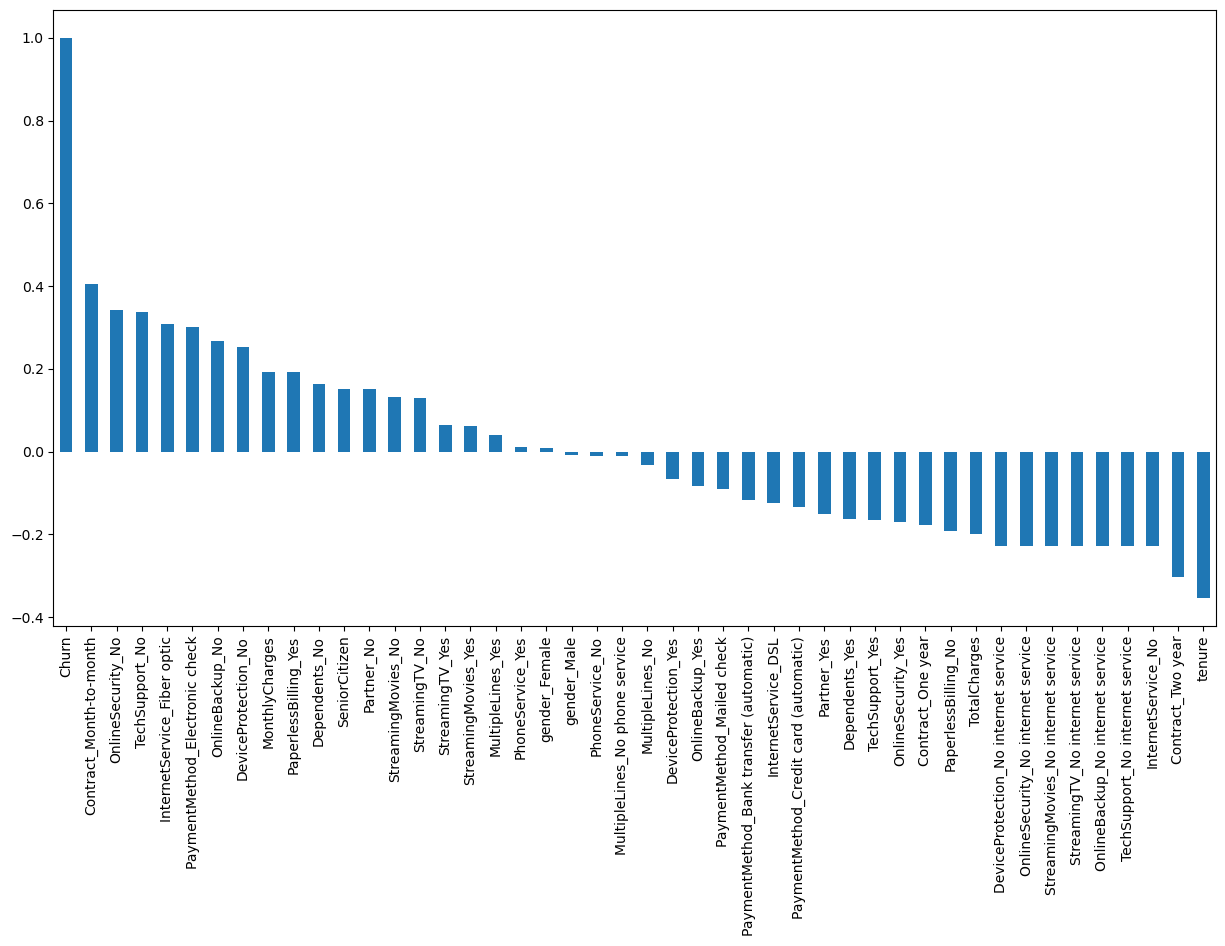

In [107]:
dummyData = pd.get_dummies(data.drop(['Churn'], axis=1))
dummyData = pd.concat([dummyData, data.loc[:, ['Churn']]], axis = 1)
data['Churn'] = np.where((data.Churn == 'No'), 0, data.Churn)
data['Churn'] = np.where((data.Churn == 'Yes'), 1, data.Churn)
dummyData['Churn'] = dummyData['Churn'].astype('uint8')

plt.figure(figsize=(15,8))
dummyData.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Important features concerning correlation with churn can be found on the ends of the depicted spectrum.<br>Classes with high, positive coefficients like month-to-month contracts, contracts without online security and tech support services and fibre optics internet connections, tend to cause churn. High,negative Coefficients mark Classes that prevent churn.<br>
This perspectove on the data allows for more detailed conclusions than the heatmap regarding the correlation of features with churn, as nominal features with a cardinality > 2 are split into a corresponding amount of features, instead of having the correlation of each of their classes summarized into one value.<br> A Good example would be the feature 'InternetService'. The Heatmap shows it's coefficient with churn to be -0.047, while the dummy encoding reveals the high impact of it's individual classes on churn, with two of its classes in the top four classes causing and preventing churn.

The last step in this EDA will be to examine the multicoliniarity in the dataset.

#### Multicolliniarity among features
To calculate multicollineatity among features the variance inflation factor (VIF) can be used.<br>
To calculete the VIF each feature is regressed against each other feature of a dataset. The calculated VIF's then show the inflation of coefficients due to multicollinearity. <br>

The VIF's values can be interpreted like this:
- VIF = 1: No significant correlation to other features in the dataset.
- VIF = 1 to 5: moderate correlation to other features.
- VIF > 5: significant correlation. Feature not fit for use of regression models.


In [ ]:
#design matrix for regression with 'Churn' as response variable
y, X = dmatrices("Churn ~ {}".format(" + ".join(scaledEncodedData.columns)), data = scaledEncodedData, return_type='dataframe')
vif_df = pd.DataFrame()
vif_df ['variable'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

            variable        VIF
0          Intercept   1.000000
1             gender   1.001747
2      SeniorCitizen   1.152204
3            Partner   1.462249
4         Dependents   1.383130
5             tenure  14.568488
6       PhoneService   1.605752
7      MultipleLines   1.409291
8    InternetService   1.787841
9     OnlineSecurity   1.263981
10      OnlineBackup   1.197010
11  DeviceProtection   1.291728
12       TechSupport   1.320771
13       StreamingTV   1.462646
14   StreamingMovies   1.460939
15          Contract   2.622643
16  PaperlessBilling   1.206039
17     PaymentMethod   1.180376
18    MonthlyCharges   5.971501
19      TotalCharges  19.855254
20             Churn   1.425989


The features 'tenure', ' MonthlyCharges' and 'TotalCharges' are multicollinear. To resolve the multicollinearity the feature with the highest VIF will be dropped successively until no vif > 5 remains in the dataset.

In [ ]:
#design matrix for regression with 'Churn' as response variable
y, X = dmatrices("Churn ~ {}".format(" + ".join(scaledEncodedData.drop(['TotalCharges'], axis=1).columns)), data = scaledEncodedData.drop(['TotalCharges'], axis=1), return_type='dataframe')
vif_df = pd.DataFrame()
vif_df ['variable'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

            variable       VIF
0          Intercept  1.000000
1             gender  1.001714
2      SeniorCitizen  1.151959
3            Partner  1.460834
4         Dependents  1.382844
5             tenure  2.851030
6       PhoneService  1.605398
7      MultipleLines  1.403779
8    InternetService  1.649812
9     OnlineSecurity  1.259353
10      OnlineBackup  1.194281
11  DeviceProtection  1.286042
12       TechSupport  1.315487
13       StreamingTV  1.462490
14   StreamingMovies  1.460301
15          Contract  2.470324
16  PaperlessBilling  1.205876
17     PaymentMethod  1.180357
18    MonthlyCharges  2.774923
19             Churn  1.366867


Already after dropping the highest VIF feature 'TotalCharges' no VIF > 2.8 remained in the dataset. This is deemed aceptable for a primary feature selection for later use in regression models.

In [ ]:
logRegData = scaledEncodedData.drop(['TotalCharges'], axis=1)

## MLMs
### Performance evaluation criteria
As the training of supervised mlms often is an incremental, heuristic process in wich different approaches for feature engineering, data sampling, hyperparametertuning, etc. are successively tested, it is advisable to define the performance criteria to be used in the model optimization and the rating of the quality of one's results. To achive this the metrics for measuring a model's performance have to be chosen in alignment with the respective context and goals.<br>
Regarding the scenario at hand, a selection of evaluation criteria becomes evident by deriving them from the initial conditions and goals of this case study:
- As initially stated, the economic damage caused by churn is greater by multidues than the costs of keeping existing customers.
- Not predicting a certain number of customers at risk of churning will therefore be worse than falsely predicting an equal number of customers to churn.
- For the training and rating of model perfomance this translates to a focus on minimizing false negatives, that is, churning customers that models predict will not churn. The corresponding metric is recall (tp/tp+fn).
- A sole focus on maximizing a model's recall will not suffice though, as, for a model to achieve a recall of 100%, all it has to do, is to predict churn for every single customer in the dataset. To rectify this, the model performace will additionaly be measures by their f1 score and ROC AUC, as these metrics are better indicators for general model performance. After balancing the data with oversampling techniques cohen's kappa can also be used.

### Data Preprocessing
This step's purpose is to transform the dataset in order to be compatible with mlms. For example the scikit-learn model libraries that . but not only basic compatibility with models must be ensured. The following section of the case study is going to   l
#### Data Leakage
Something to be concious of is the fact, that some methods of data preprocessing

#### 

#### Class imbalance




### Class Imbalance
Eine Eigenschaft des Datensatzes, die in der EDA festgestellt worden ist, ist die Ungleichverteilung der Zielvariable 'Churn'. Als Teil der Pipelines soll mit verschiedenen Samplingmethoden gearbeitet werden.

Cost sensitive learning - geht davon aus, dass unterschiedliche Klassifikationsfehler (false-positives und false-negatives) unterschiedliche Kosten (Qualitätseinbußen) für ein Model verursachen. Bei einer Ungleichverteilung der prediction variable mit einem kleinen Anteil positiver Ausprägungen ist ein Klassifikationsfehler einer positiven Ausprägung als negativ wesentlich einflussreicher auf die Modellperformance, als eine false-negative Klassifikation.

SMOTE:

- Ziehung random data entry der minority class
- k-nearest neigbours zu data entry
- Einen nächsten Nachbarn wählen und die Differenz der Vektoren der Featureausprägungen mit einem Faktor von 0 bis 1 multiplizieren
- Der so entstehende Datenpunkt ist ein synthetischer Datenpunkt, der im Vergleich zu kopierten Datenpunkten im oversampling noise enthält In der Konsequenz stellt SMOTE häufig einen Kompromiss dar, in dem mehr x für weniger y in Kauf genommen werden. Demnach verringert sich die Accuracy betroffener Modelle, während die Sensitivität (Recall) steigt



## Data Leakage - Dataprep Pipeline
bei der EDA mussten für die Anwendungen einiger Funktionen/Visualisierungen bereits Veränderungen am Datensatz vorgenommen werden.
Beispielsweise wurden die Daten für die Erstellung einer Heatmap in Normalform gebracht, was bei einem darauf folgenden Unterteilen der Daten in Trainings- und Testsets der Daten zu einen unrealistischen Vorteil für Vorhersagen des Trainingssets führen kann, da durch das Skalieren auf den kompletten Datensatz Informationen über die globale Werteverteilung (inklusive Testdaten) in das Trainingsset mit eingeflossen sind.

Um Data Leakage zu verhindern wird eine Pipeline ersellt, welche die nötigen Datentransformationen für die Vorbereitung des vorliegenden Datensatzes für Trainings- und Testsets separat vornimmt. Die Schritte sind:
- Imputation: fehlender Werte in 'tenure' & 'TotalCharges' ('TotalCharges' werden in Kolinearitätssensiblen Modellen wegen hohem VIF vorab aussortiert)
- Feature Engineering: 
- Normalisieren: 
- Balancing (nur Trainingsdaten): Overfitting Variante SMOTE.
- Feature Selection:

## Model Pipeline
die Model Pipeline soll für jedes Model genutzt werden können, und beinhaltet die Schritte
- Hyperparameter Tuning
- Testing von Hyperparametern via Corss Validation
- Ermitteln der optimalen Hyperparameter
- Testen am Testset
- Auswertung der Metriken des besten Models

Diese Methode Bedeutet, dass bei der folgenden Beschreibung der Modelle insbesondere auf ihre Funktionsweisen anhand der Hyperparameter eingegangen werden kann.

### Cross Validation
Kurze Erläuterung

# Pipeline Testing

Zuerst wird der Datensatz erneut einer Variable zugewiesen, um eventuelle ungewollte Transformationen aus der EDA auszuschließen.

data prep

In [ ]:
d = ['Model', 'Recall', 'F1 score', 'ROC AUC', "Cohen's kappa"]
resultsTable = pd.DataFrame(columns = d)

def addResultsRow(newRow):
    global resultsTable
    resultsTable = pd.concat([resultsTable, newRow.to_frame().T], ignore_index=True)
    


In [ ]:
#loading unprocessed dataset
finalData = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
finalData.drop(['customerID'], axis= 1, inplace = True)

#repeat data processing from EDA
#encode chrun
finalData['Churn'] = np.where((finalData.Churn == 'No'), 0, finalData.Churn)
finalData['Churn'] = np.where((finalData.Churn == 'Yes'), 1, finalData.Churn)
finalData['Churn'] = finalData['Churn'].astype('uint8')
#change type of 'TotalCharges'
finalData['TotalCharges']=finalData['TotalCharges'].replace(" ", 0)
finalData['TotalCharges']= pd.to_numeric(finalData['TotalCharges'])
#Imputation of 11 missin value rows to mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform([finalData['tenure']])
imp.fit_transform([finalData['TotalCharges']])
#partitioning
X = finalData.drop(['Churn'], axis=1)
y = finalData['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.3, stratify=finalData.Churn)

#Encoding & Scaling - Use pipeline to encode categoric and scale numeric features







Die Decision Tree und Random Forest Modelle benötigen üblicherweise keine weitere Vorbereitung der Daten. Die hier verwendeten Algorithmen aktzeptieren jedoch nur numerische Features, weshalb auch hier eine Entscheidung zwischen OneHot und Label Enkodierung getroffen werden muss. Es wurde sich für die OneHot Methode entschieden, die auch im populären Algorithmus Catboost für kategorische Features verwendet wird. (https://catboost.ai/en/docs/features/categorical-features) Multikolinearität muss hier nicht entfernt werden.


Für die logistische Regression müssen die Trainings- und Testdatensets in Normalform skaliert und OneHot encodiert werden.
Da die logistischen Regression Klassifikationen (Vorhersagen) über die linearen Abhängigkeiten der Features zur Zielvariable berechnet, dürfen die Trainingssets keine Multikolinearität beinhalten, da durch sie Veränderungen der Wahrscheinlichkeit der Vorhersagen nicht auf den Einfluss einzelner Features zurückgeführt werden können.

In [ ]:
le = LabelEncoder()
#logReg dummies
X_trainLogReg1 = pd.get_dummies(X_train, drop_first=True)
X_trainLogRegLabels = X_train.apply(le.fit_transform)


X_trainLogReg1.drop('TotalCharges', axis=1)
#logReg scaling
scaler = MinMaxScaler(feature_range=(0,1))
X_trainLogReg1[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_trainLogReg1[['tenure', 'MonthlyCharges']])
X_trainLogRegLabels[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_trainLogRegLabels[['tenure', 'MonthlyCharges']])

#logReg dummies testset
X_testLogReg1 = pd.get_dummies(X_test, drop_first= True)
X_testLogReg1[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_testLogReg1[['tenure', 'MonthlyCharges']])
X_testLogRegLabels = X_test.apply(le.fit_transform)
X_testLogRegLabels[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_testLogRegLabels[['tenure', 'MonthlyCharges']])


#trees dummies
X_trainTrees1 = pd.get_dummies(X_train)
X_testTrees1 = pd.get_dummies(X_test)
#tree labels
X_trainTreesLabels = X_train.apply(le.fit_transform)
X_testTreesLabels = X_test.apply(le.fit_transform)

Direktes Testen an Validierungsdaten.

In [ ]:
def modelMetrics(y_valid, preds, modelName):
    #recall
    recall = round(recall_score(y_valid, preds),3)
    #f1 score
    f1 = round(f1_score(y_valid, preds), 3)
    #cohen kappa
    kappa  = round(cohen_kappa_score(y_valid, preds), 3)
    #roc
    f = plt.figure().clf()
    fpr, tpr, _ = roc_curve(y_valid, preds)
    auc = round(roc_auc_score(y_valid, preds), 4)
    plt.plot(fpr, tpr, label= modelName + ' AUC= '+ str(auc))
    plt.legend()

    #add row to results table
    new_row = pd.Series({'Model': modelName,'Recall': recall,'F1 score': f1, 'ROC AUC': auc, "Cohen's kappa": kappa})
    addResultsRow(new_row)

Create a Table to save all model metrics into.

In [ ]:
print(resultsTable)


Empty DataFrame
Columns: [Model, Recall, F1 score, ROC AUC, Cohen's kappa]
Index: []


LogReg
tree
forest


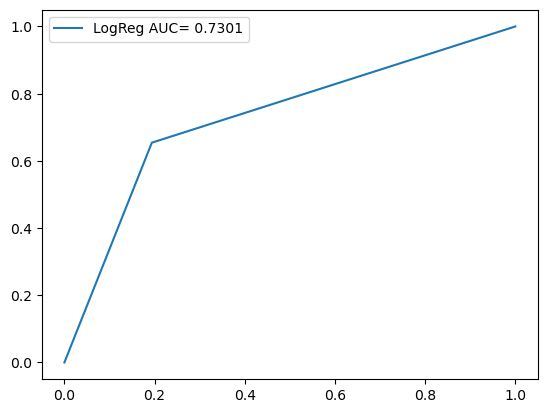

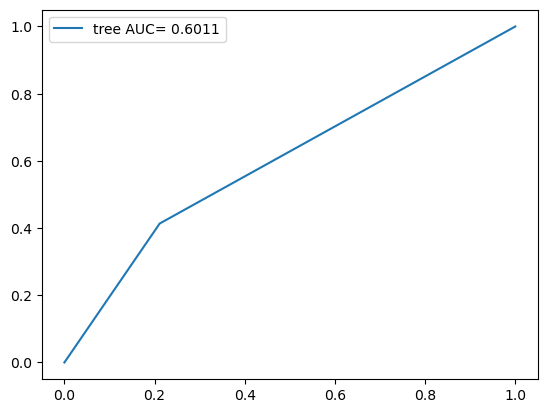

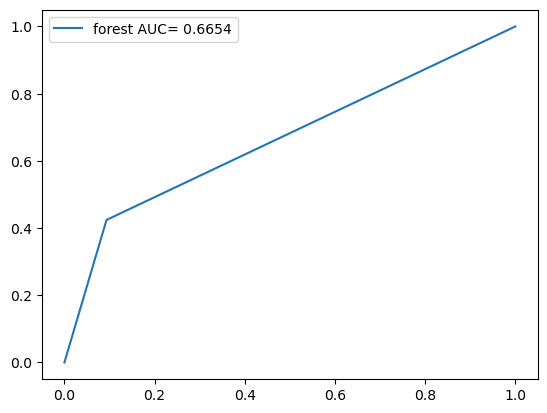

In [ ]:
logRegLeEnc = LogisticRegression(random_state=42, max_iter=10000)
treeLeEnc = DecisionTreeClassifier(random_state=42)
forestLeEnc = RandomForestClassifier(random_state=42)

logRegLeEnc.fit(X_trainLogRegLabels, y_train)
logRegLePreds = logRegLeEnc.predict(X_testLogRegLabels)
modelMetrics(y_test, logRegLePreds, "LogReg")




treeLeEnc.fit(X_trainTreesLabels, y_train)
treeLeEncPreds = treeLeEnc.predict(X_testTreesLabels)
modelMetrics(y_test, treeLeEncPreds, "tree")

forestLeEnc.fit(X_trainTreesLabels, y_train)
forestLeEncPreds = forestLeEnc.predict(X_testTreesLabels)
modelMetrics(y_test, forestLeEncPreds, "forest")


In [ ]:

resultsTable



,Model,Recall,F1 score,ROC AUC,Cohen's kappa
0,LogReg,0.654189,0.597234,0.7301,0.433828
1,tree,0.413547,0.413916,0.6011,0.202322
2,forest,0.424242,0.504237,0.6654,0.368103
3,LogReg,0.654,0.597,0.7301,0.434
4,tree,0.414,0.414,0.6011,0.202
5,forest,0.424,0.504,0.6654,0.368


LogReg
classification report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

cohen kappa
 0.4493120388931243 



confusion matrix:

tree
classification report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1552
           1       0.49      0.49      0.49       561

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113

cohen kappa
 0.30916486482914673 



confusion matrix:

forest
classification report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.48  

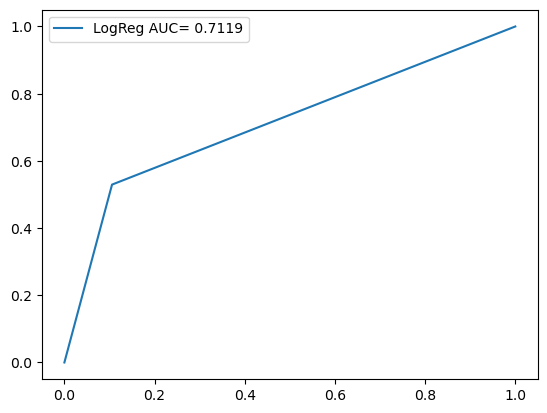

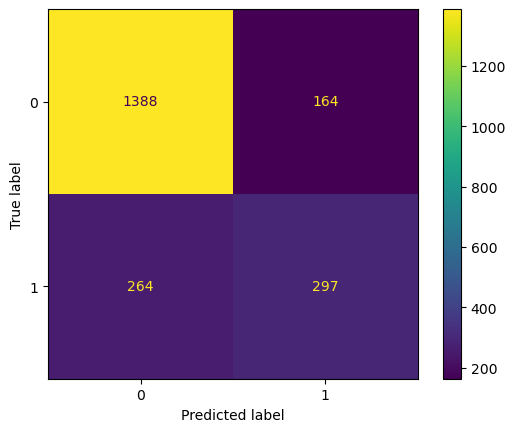

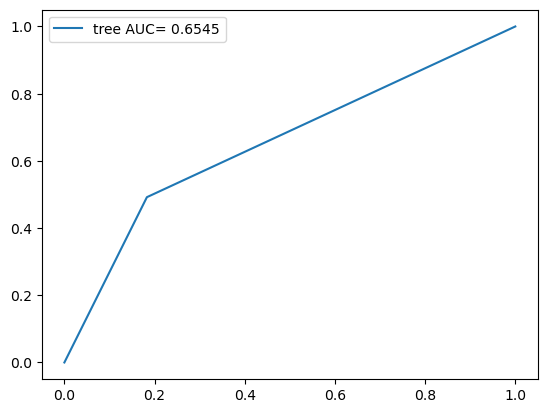

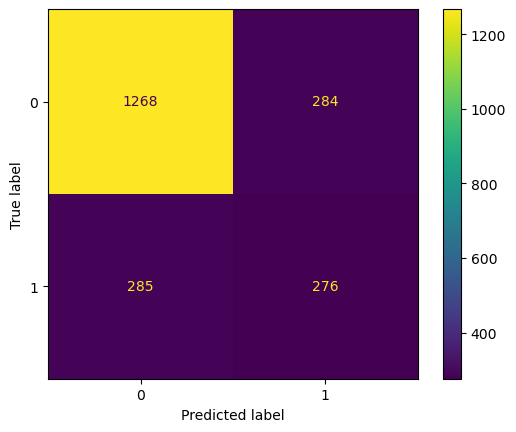

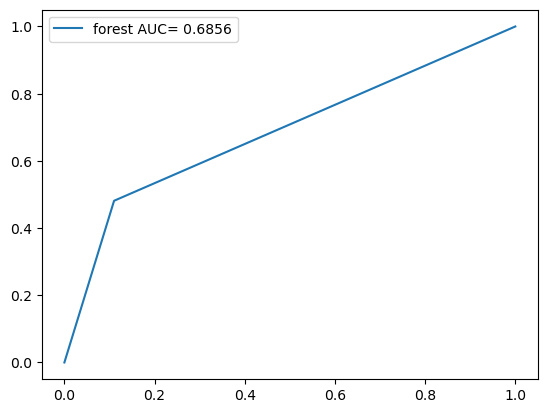

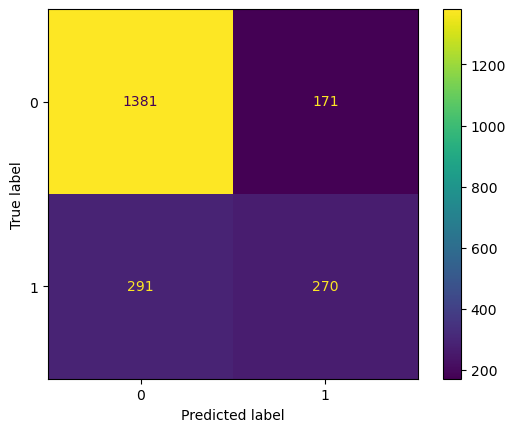

In [ ]:
#instatiating all models for feature selection
logReg1 = LogisticRegression(random_state=42, max_iter=10000)
tree1 = DecisionTreeClassifier(random_state=42)
forest1 = RandomForestClassifier(random_state=42)

logReg1.fit(X_trainLogReg1, y_train)
logReg1preds = logReg1.predict(X_testLogReg1)
modelMetrics(y_test, logReg1preds, "LogReg")

tree1.fit(X_trainTrees1, y_train)
tree1preds = tree1.predict(X_testTrees1)
modelMetrics(y_test, tree1preds, "tree")

forest1.fit(X_trainTrees1, y_train)
forest1preds = forest1.predict(X_testTrees1)
modelMetrics(y_test, forest1preds, "forest")


Der Vergleich der Performace zwischen OneHot und Labelkodierung deutet auf die Gültigkeit der Richtlinien zum Kodieren kategorischer Features für diesen Datensatz hin. Dies lässt sich damit weiter Begründen, dass der Datensatz keine Features mit hoher Kardinalität enthält. Modelle performen häufig besser, wenn diese in Labelkodierter Form vorkommen. Da dieser Vorteil der Labelkodierung also wegfällt, bleibt nur ihr Nachteil bestehen, durch den Modelle die verschiedenen Integer Ordinalität der Features interpretiert werden.

Für weitere Schritte der Modellerstellung werden als Basis die OneHot kodierten Datensätze genutzt.
Hiermit ist eine Baseline zum Vergleich der Modelle erstellt.

## Recursive Feature Eliminiation (mit cross validation)
Diese Methode --- Erklärung


Zur Vorbereitung werden kategorische Variablen Label Encoded, d.h. jeder Ausprägung wird ein Integer zugewiesen. Im Gegensatz zur OneHot Enkodierung wird ein Feature hierdurch nicht auf mehrere aufgeteilt. Der Nachteil der Label Enkodierung besteht darin, dass Modelle ihre Vorhersagen ggf. auf die Größenverhältnisse der den Ausprägungen zugewiesenen Variablen zurückführen. Diese Nachteil wird in diesem Fall hingenommen und in der Bewertung der Ergebnisse mit einbezogen.

Optimal number of features: 15


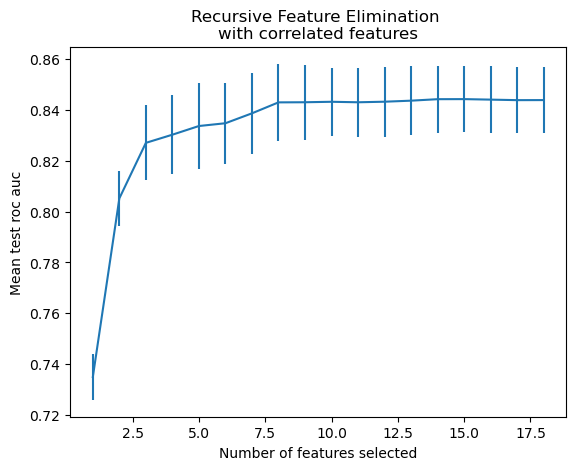

Index(['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'],
      dtype='object')
Optimal number of features: 4


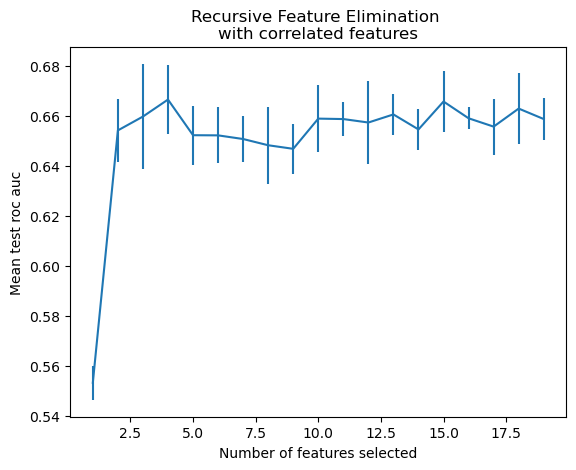

Index(['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Optimal number of features: 17


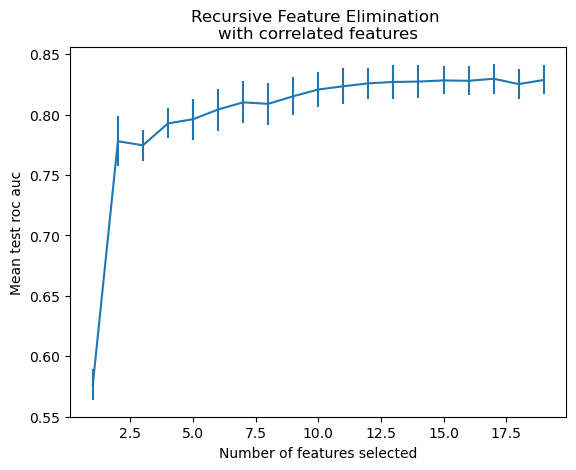

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [ ]:

le = LabelEncoder()
scaler = MinMaxScaler(feature_range=(0,1))

#X_train = pd.get_dummies(X_train, drop_first = True)
X_trainLeScaled = X_train.apply(le.fit_transform)
X_trainLeScaled[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_trainLeScaled[['tenure', 'MonthlyCharges', 'TotalCharges']])

#instatiating all models for feature selection
logReg2 = LogisticRegression(random_state=42, max_iter=10000)
tree2 = DecisionTreeClassifier(random_state=42)
forest2 = RandomForestClassifier(random_state=42)

clfs = [logReg2, tree2, forest2]

#optimal features for each model NOT ONEHOT
min_features_to_select = 1  # Minimum number of features to consider
cv = StratifiedKFold(5)


for clf in clfs:
    X_used = X_trainLeScaled.drop('TotalCharges', axis=1) if clf == logReg2 else X_trainLeScaled

    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring="roc_auc",
        min_features_to_select=min_features_to_select,
        n_jobs=2,
    )
    rfecv.fit(X_used, y_train)

    print(f"Optimal number of features: {rfecv.n_features_}")

    #plotting number of features against cross-val scores
    n_scores = len(rfecv.cv_results_["mean_test_score"])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Mean test roc auc")
    plt.errorbar(
        range(min_features_to_select, n_scores + min_features_to_select),
        rfecv.cv_results_["mean_test_score"],
        yerr=rfecv.cv_results_["std_test_score"],
    )
    plt.title("Recursive Feature Elimination \nwith correlated features")
    plt.show()

    mask = rfecv.get_support()
    features = X_used.columns
    best_features = features[mask]
    print(best_features)



Skepsis bei 4 Features Decision Tree. Trotzdem zeigt der Algorithmus gerade beim Decision Tree eine wesentlich höhere Varianz der Ergebnisse des ROC AUC für wechselnde Featurezahlen an. Sollte die Performace durch die Feature Selection nicht weiter steigen, sollte überlegt werden, auf einen anderen Algorithmus zurückzugreifen.

Erstellung der neuen train & test Datensätze für alle drei Algorithmen. Testsets müssen dieselben Features aufweisen, wesegen auch diese angepasst werden

In [ ]:
X_trainLogRegFeatures = X_train[['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]
X_testLogRegFeatures = X_test[['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]

X_trainTreeFeatures = X_train[['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']]
X_testTreeFeatures = X_test[['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']]

X_trainForestFeatures = X_train[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
X_testForestFeatures = X_test[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

#logReg dummies
X_trainLogReg2 = pd.get_dummies(X_trainLogRegFeatures, drop_first=True)
X_testLogReg2 = pd.get_dummies(X_testLogRegFeatures, drop_first=True)

#logReg labels
#X_trainLogReg2 = X_trainLogRegFeatures.apply(le.fit_transform)
#X_testLogReg2 = X_testLogRegFeatures.apply(le.fit_transform)

#logReg scaling
scaler = MinMaxScaler(feature_range=(0,1))
X_trainLogReg2[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_trainLogReg2[['tenure', 'MonthlyCharges']])
X_testLogReg2[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_testLogReg2[['tenure', 'MonthlyCharges']])



#trees dummies
X_trainTree2 = pd.get_dummies(X_trainTreeFeatures)
X_testTree2 = pd.get_dummies(X_testTreeFeatures)
#forest dummies
X_trainForest2 = pd.get_dummies(X_trainForestFeatures)
X_testForest2 = pd.get_dummies(X_testForestFeatures)


Testing feature Selection

LogReg Feature Selected
classification report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.66      0.55      0.60       561

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

cohen kappa
 0.47500624177358475 



confusion matrix:

tree Feature Selected
classification report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1552
           1       0.46      0.44      0.45       561

    accuracy                           0.72      2113
   macro avg       0.63      0.63      0.63      2113
weighted avg       0.71      0.72      0.71      2113

cohen kappa
 0.26020276493400496 



confusion matrix:

forest Feature Selected
classification report:
               precision    recall  f1-score   support

           0       0.83      0.88    

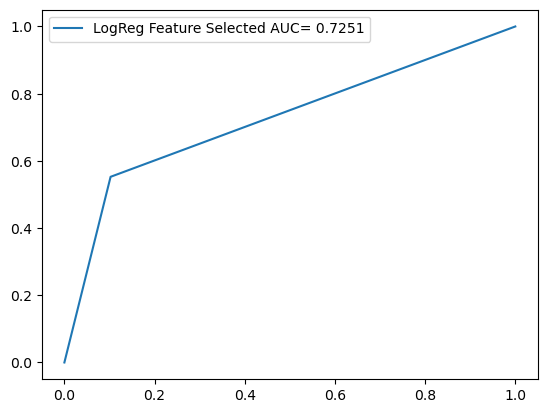

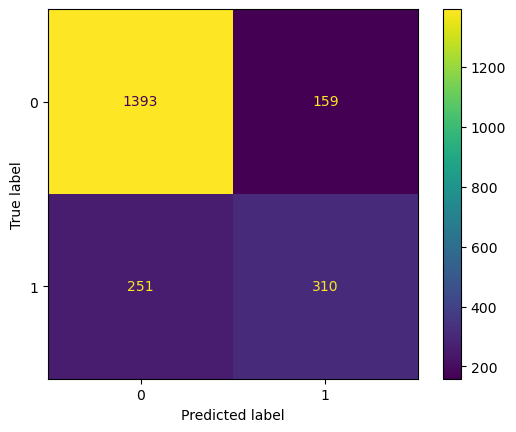

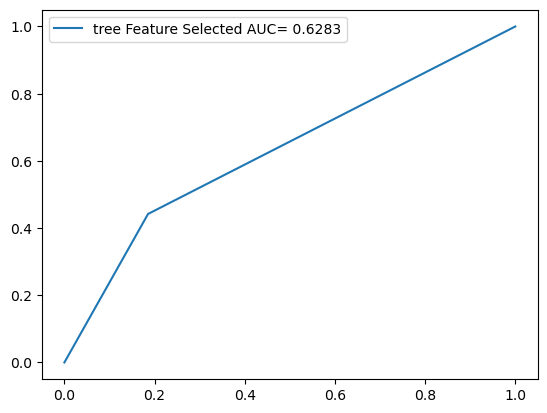

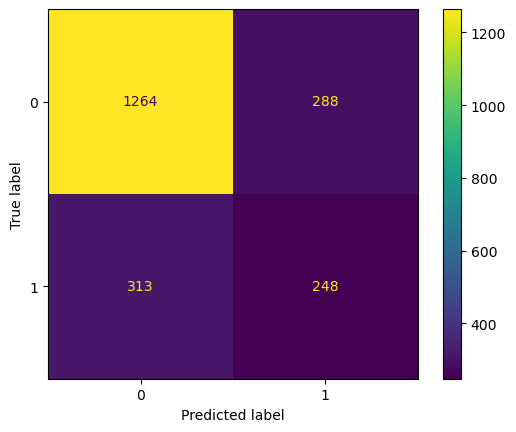

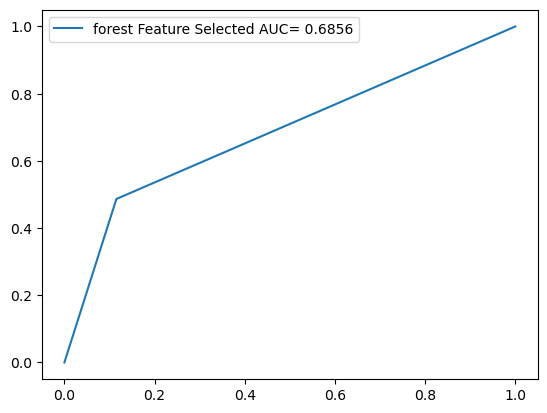

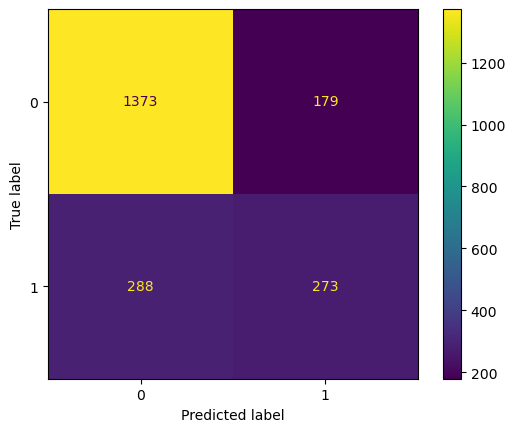

In [ ]:
#instatiating all models for feature selection
logReg2 = LogisticRegression(random_state=42, max_iter=10000)
tree2 = DecisionTreeClassifier(random_state=42)
forest2 = RandomForestClassifier(random_state=42)

logReg2.fit(X_trainLogReg2, y_train)
logReg2preds = logReg2.predict(X_testLogReg2)
modelMetrics(y_test, logReg2preds, "LogReg Feature Selected")

tree2.fit(X_trainTree2, y_train)
tree2preds = tree2.predict(X_testTree2)
modelMetrics(y_test, tree2preds, "tree Feature Selected")

forest2.fit(X_trainForest2, y_train)
forest1preds = forest2.predict(X_testForest2)
modelMetrics(y_test, forest1preds, "forest Feature Selected")

Die Ergebnisse zeigen Verbesserungen bei der Logistischen Regression. Hier werden die ermittelten Features beibehalten. Für den Decision Tree und Random Forest haben sich relevante Metriken verschlechtert, oder sind gleich geblieben. Es bleibt zu ermitteln, weshalb der RFE Algorithmus hier eine Verminderung der Features als optimal ermittelt, insbesondere, da sich die gesetzte Zielmetrik des ROC AUC hierdurch verschlechtert hat. Ein wahrscheinlicher Grund ist die erforderliche Labelkodierung, mit der der Algorithmus arbeitet. Ein Algorithmus der mit der für die Modelle genutzen Onehot Kodierung arbeitet, wäre hier vorzuziehen.


Im nächsten Schritt wird die Feature Imbalance der Zielvariable mittels Smote ausgeglichen. Hier werden die Tree und Forest Classifier nochmals mit den Standard Features und denen aus der recursive feature elimination getestet.

## Oversampling & first testrun without hyperparametertuning
Die Features, die im letzten Schritt bestimmt worden sind, werden nach Beheben der Ungleichverteilung der Zielvariable durch SMOTE erneut an Versionen der zu untersuchenden Modelle getestet.
Die Ergebnisse werden als dritte Reihe von Vergleichswerten aufgenommen, die durch ein Hyperparametertuning nochmals verbessert werden sollten.

Fix Class Imbalance

In [ ]:
"""
X_trainLogRegFeatures = X_train[['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]
X_testLogRegFeatures = X_test[['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]

X_trainTreeFeatures = X_train[['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']]
X_testTreeFeatures = X_test[['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']]

X_trainForestFeatures = X_train[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
X_testForestFeatures = X_test[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

#logReg dummies
X_trainLogReg2 = pd.get_dummies(X_trainLogRegFeatures, drop_first=True)
X_testLogReg2 = pd.get_dummies(X_testLogRegFeatures, drop_first=True)
#logReg scaling
scaler = MinMaxScaler(feature_range=(0,1))
X_trainLogReg2[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_trainLogReg2[['tenure', 'MonthlyCharges']])



#trees dummies
X_trainTree2 = pd.get_dummies(X_trainTreeFeatures)
X_testTree2 = pd.get_dummies(X_testTreeFeatures)
#forest dummies
X_trainForest2 = pd.get_dummies(X_trainForestFeatures)
X_testForest2 = pd.get_dummies(X_testForestFeatures)
"""

In [ ]:
print(X_train.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [ ]:
X_trainLogRegResampled, y_trainLogRegResampled = SMOTENC(random_state=42, categorical_features=[0,1,3,4,5,6,7,8,9,10,11,12,13]).fit_resample(X_trainLogRegFeatures, y_train)
X_trainTreeResampled, y_trainTreeResampled = SMOTENC(random_state=42, categorical_features=[0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]).fit_resample(X_trainTrees1, y_train)
X_trainForestResampled, y_trainForestResampled = SMOTENC(random_state=42, categorical_features=[0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]).fit_resample(X_trainTrees1, y_train)
#for unencoded models
X_trainResampled, y_trainResampled = SMOTENC(random_state=42, categorical_features=[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]).fit_resample(X_train, y_train)

#logReg labels
X_trainLogReg3 = pd.get_dummies(X_trainLogRegResampled, drop_first=True)
#X_trainLogReg3 = X_trainLogRegResampled.apply(le.fit_transform)

#logReg scaling
scaler = MinMaxScaler(feature_range=(0,1))
X_trainLogReg3[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_trainLogReg3[['tenure', 'MonthlyCharges']])
#trees dummies
X_trainTree3 = pd.get_dummies(X_trainTreeResampled)
#forest dummies
X_trainForest3 = pd.get_dummies(X_trainForestResampled)


LogReg Feature Selected Smote
classification report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1552
           1       0.51      0.76      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.74      0.75      2113

cohen kappa
 0.42756037706373573 



confusion matrix:

tree Smote
classification report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1552
           1       0.47      0.54      0.50       561

    accuracy                           0.72      2113
   macro avg       0.65      0.66      0.65      2113
weighted avg       0.73      0.72      0.72      2113

cohen kappa
 0.3051323594670712 



confusion matrix:

forest Smote
classification report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1552


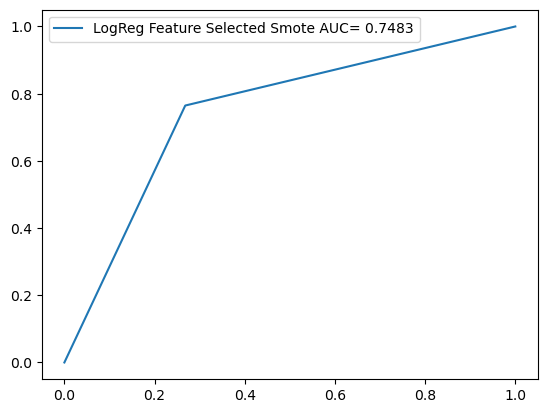

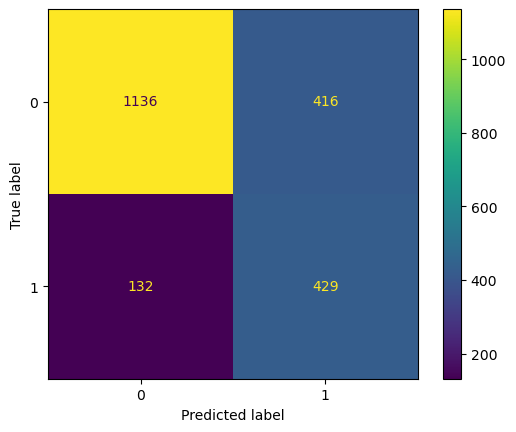

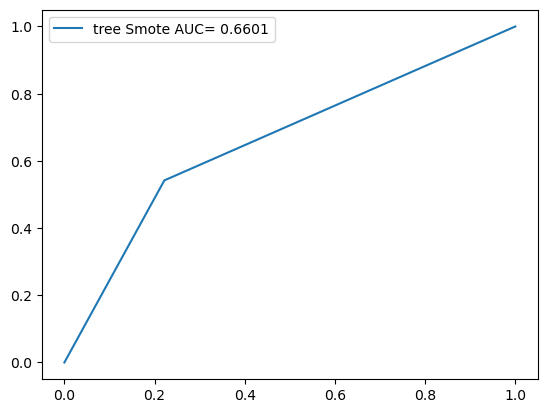

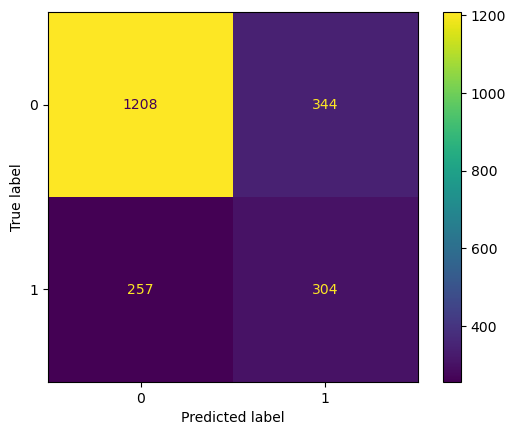

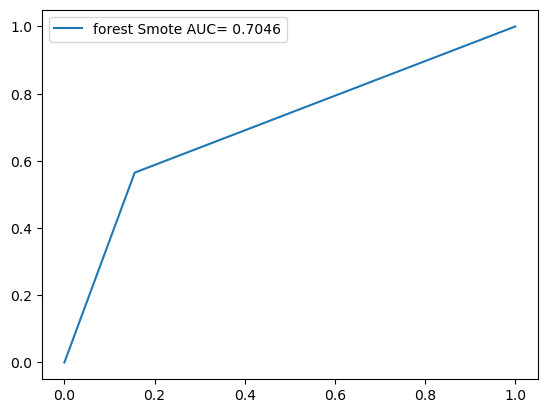

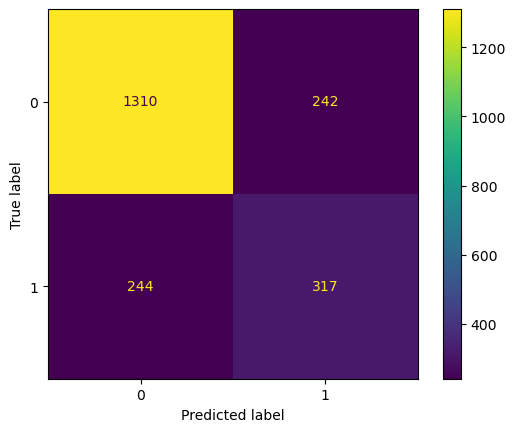

In [ ]:
logReg3 = LogisticRegression(random_state=42, max_iter=10000)
tree3 = DecisionTreeClassifier(random_state=42)
forest3 = RandomForestClassifier(random_state=42)


logReg3.fit(X_trainLogReg3, y_trainLogRegResampled)
logReg3preds = logReg3.predict(X_testLogReg2)
modelMetrics(y_test, logReg3preds, "LogReg Feature Selected Smote")

tree3.fit(X_trainTree3, y_trainTreeResampled)
tree3preds = tree3.predict(X_testTrees1)
modelMetrics(y_test, tree3preds, "tree Smote")

forest3.fit(X_trainForest3, y_trainForestResampled)
forest3preds = forest3.predict(X_testTrees1)
modelMetrics(y_test, forest3preds, "forest Smote")

Bei Decision Tree und Random Forest tritt der erwartette Kompromiss von Accuracyverlust gegen höhere Modellsensivität ein, außerdem performen die Modelle genausogut ohne Feature enkodierung, weshalb diese für das hyperparametertuning ausgelassen werden.

## Hyperparameter tuning of mlmws

In [ ]:
tree3.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
"""
logReg3 = LogisticRegression(random_state=42, max_iter=10000)
tree3 = DecisionTreeClassifier(random_state=42)
forest3 = RandomForestClassifier(random_state=42)


logReg3.fit(X_trainLogReg3, y_trainLogRegResampled)
logReg3preds = logReg3.predict(X_testLogReg2)
modelMetrics(y_test, logReg3preds, "LogReg Feature Selected Smote")

tree3.fit(X_trainTree3, y_trainLogRegResampled)
tree3preds = tree3.predict(X_testTrees1)
modelMetrics(y_test, tree3preds, "tree Smote")

forest3.fit(X_trainForest3, y_trainLogRegResampled)
forest3preds = forest3.predict(X_testTrees1)
modelMetrics(y_test, forest3preds, "forest Smote")
"""

LogReg Feature Selected Smote Hyperparam Tuning
classification report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1552
           1       0.51      0.77      0.61       561

    accuracy                           0.74      2113
   macro avg       0.71      0.75      0.71      2113
weighted avg       0.80      0.74      0.76      2113

cohen kappa
 0.4345955602862206 



confusion matrix:



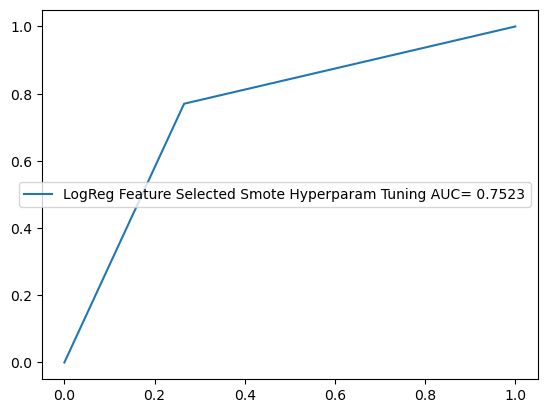

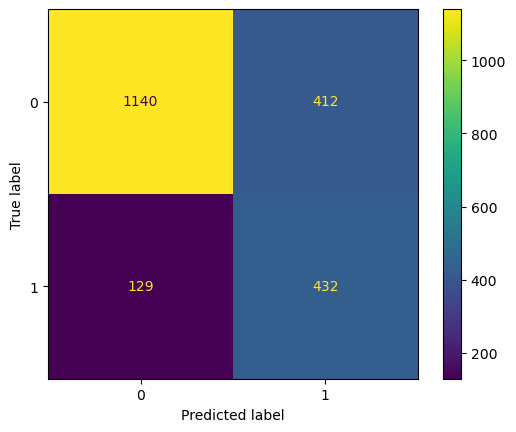

In [ ]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.
scores = ["precision", "recall", "roc_auc"]

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']},
]


# Create grid search object

clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, scoring="roc_auc", n_jobs=-1)


# Fit on data

logReg4 = clf.fit(X_trainLogReg3, y_trainLogRegResampled)
logReg4preds = logReg4.predict(X_testLogReg2)
modelMetrics(y_test, logReg4preds, "LogReg Feature Selected Smote Hyperparam Tuning")


tree Smote Hyperparam Tuning
classification report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      1552
           1       0.50      0.65      0.57       561

    accuracy                           0.74      2113
   macro avg       0.68      0.71      0.69      2113
weighted avg       0.76      0.74      0.75      2113

cohen kappa
 0.38277968640279914 



confusion matrix:



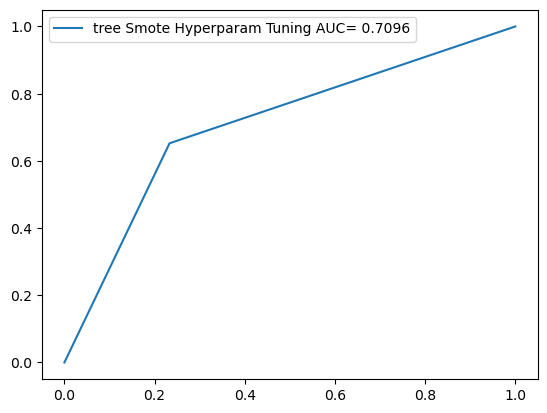

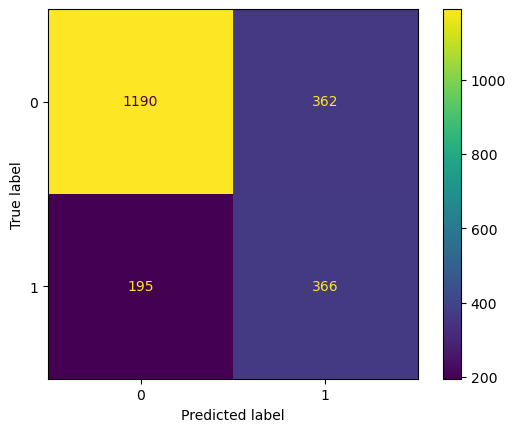

In [ ]:
# Create param grid.
param_grid = [
    {'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12],
    },
]
# Create grid search object
clf = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv = 5, scoring="roc_auc", n_jobs=-1)
# Fit on data
tree4 = clf.fit(X_trainTree3, y_trainTreeResampled)
tree4preds = tree4.predict(X_testTrees1)
modelMetrics(y_test, tree4preds, "tree Smote Hyperparam Tuning")

In [ ]:
print(tree4.best_estimator_.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Beste Parameter sind 'Criterion' : gini mit maximaler Tiefe der Branches von 6

c:\Users\Dominik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


forest Smote Hyperparam Tuning
classification report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1552
           1       0.56      0.70      0.62       561

    accuracy                           0.78      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.80      0.78      0.78      2113

cohen kappa
 0.4669972039257032 



confusion matrix:



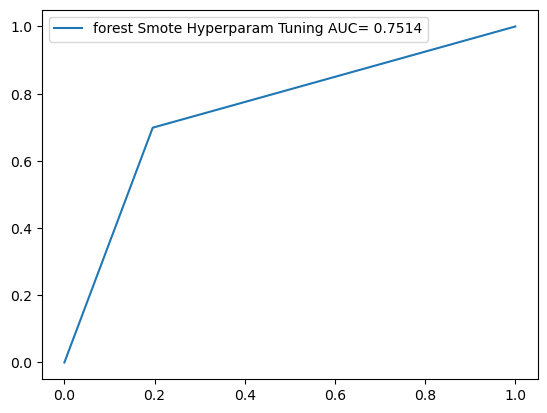

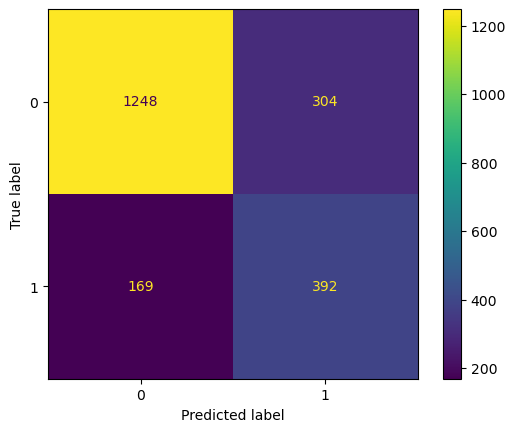

In [ ]:
# Create param grid.
param_grid = [
    {
    'n_estimators': [1000, 1500, 2000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [12, 15, 20,25],
    'min_samples_leaf': [50, 100, 150],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
    },
]
# Create grid search object
clf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 5, scoring="roc_auc", n_jobs=-1)
# Fit on data
forest4 = clf.fit(X_trainForest3, y_trainForestResampled)
forest4preds = forest4.predict(X_testTrees1)
modelMetrics(y_test, forest4preds, "forest Smote Hyperparam Tuning")

In [ ]:
print(forest4.best_estimator_.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
# Create param grid.
param_grid = [
    {
    'n_estimators': [100, 500, 1000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [12, 15, 20,25],
    'min_samples_leaf': [50, 100, 150],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'max_features': [5, 10, 20, 30]
    },
]
# Create grid search object
clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid = param_grid, cv = 5, scoring="accuracy", n_jobs=-1)
# Fit on data
forest4 = clf.fit(X_trainForest3, y_trainForestResampled)
forest4Preds = forest4.predict(X_testTrees1)
modelMetrics(y_test, forest4Preds, "forest Smote Hyperparam Tuning")

KeyboardInterrupt: 

forest Smote Hyperparam Tuning
classification report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1552
           1       0.56      0.69      0.62       561

    accuracy                           0.78      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.79      0.78      0.78      2113

cohen kappa
 0.46217524430177326 



confusion matrix:



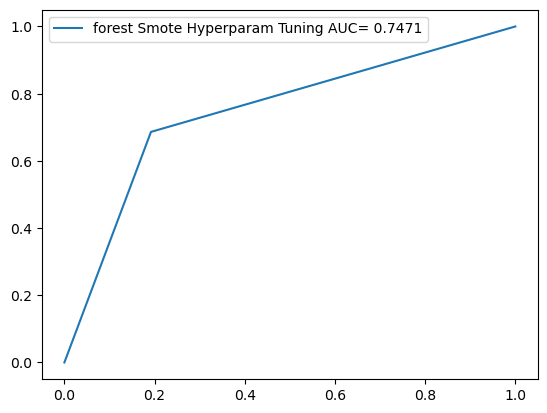

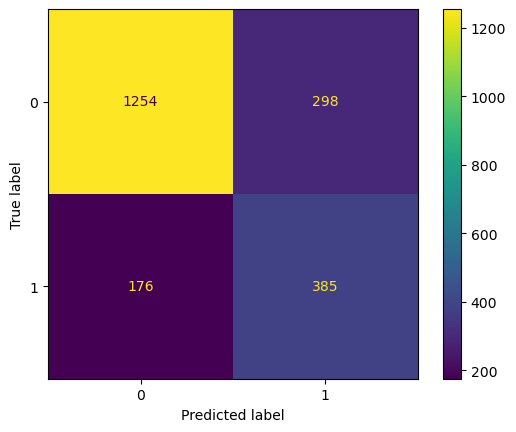

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    'n_estimators': [100, 500, 1000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [12, 15, 20,25],
    'min_samples_leaf': [50, 100, 150],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'max_features': [5, 10, 20, 30]
    }

clf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=random_grid, scoring="accuracy", n_iter=100, cv=5, random_state=42, n_jobs=-1)

forest4 = clf.fit(X_trainForest3, y_trainForestResampled)
forest4Preds = forest4.predict(X_testTrees1)
modelMetrics(y_test, forest4Preds, "forest Smote Hyperparam Tuning")


In [ ]:
print(forest4.best_estimator_.get_params())

NameError: name 'forest4' is not defined

## Feature Importance

Text(0, 0.5, 'Mean decrease in impurity')

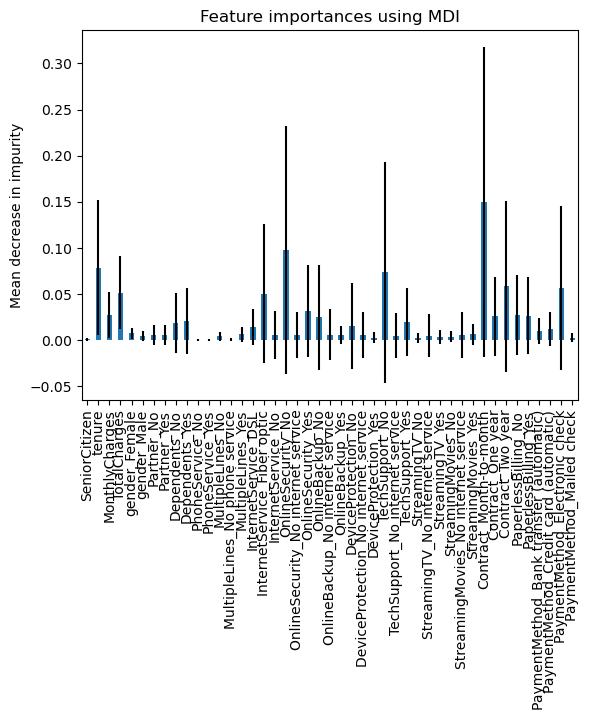

In [ ]:
feature_names = X_trainForest3.columns

importances = forest4.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest4.best_estimator_.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()

Text(0, 0.5, 'Mean decrease in impurity')

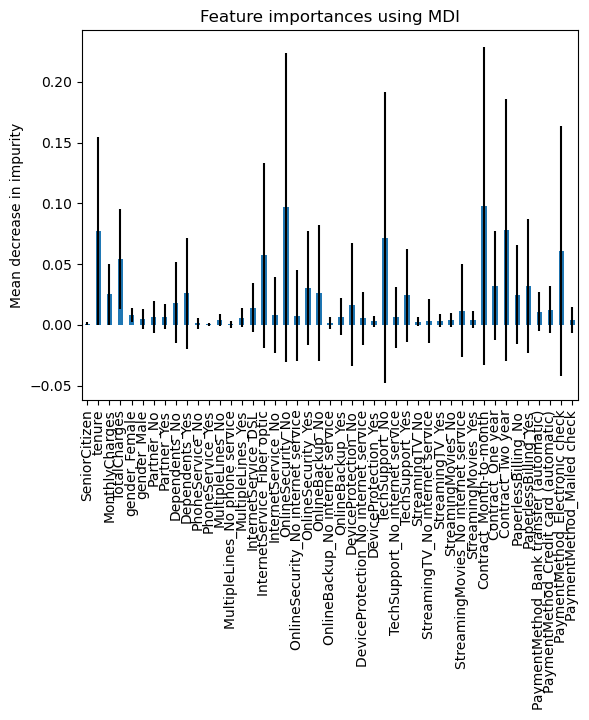

In [ ]:
feature_names = X_trainForest3.columns

importances = forest4.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest4.best_estimator_.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()

In [ ]:
logReg4_importance = permutation_importance(logReg4, X_test, y_test)
print(logReg4_importance['importances_mean'])